In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s3e19/train.csv', parse_dates=['date'], infer_datetime_format=True)
df['date'] = df['date'].dt.to_period('D')
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [3]:
df.shape

(136950, 6)

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype    
---  ------    --------------   -----    
 0   id        136950 non-null  int64    
 1   date      136950 non-null  period[D]
 2   country   136950 non-null  object   
 3   store     136950 non-null  object   
 4   product   136950 non-null  object   
 5   num_sold  136950 non-null  int64    
dtypes: int64(2), object(3), period[D](1)
memory usage: 6.3+ MB


In [5]:
df.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [6]:
df.nunique()

id          136950
date          1826
country          5
store            3
product          5
num_sold      1028
dtype: int64

In [7]:
for col in ['country','store','product']:
    print(f'The unique values in {col} are: \n', df[col].unique())
    print()

The unique values in country are: 
 ['Argentina' 'Canada' 'Estonia' 'Japan' 'Spain']

The unique values in store are: 
 ['Kaggle Learn' 'Kaggle Store' 'Kagglazon']

The unique values in product are: 
 ['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']



In [8]:
df.iloc[500:550]

,id,date,country,store,product,num_sold
500,500,2017-01-07,Japan,Kaggle Store,Using LLMs to Improve Your Coding,175
501,501,2017-01-07,Japan,Kaggle Store,Using LLMs to Train More LLMs,180
502,502,2017-01-07,Japan,Kaggle Store,Using LLMs to Win Friends and Influence People,28
503,503,2017-01-07,Japan,Kaggle Store,Using LLMs to Win More Kaggle Competitions,156
504,504,2017-01-07,Japan,Kaggle Store,Using LLMs to Write Better,142
505,505,2017-01-07,Japan,Kagglazon,Using LLMs to Improve Your Coding,665
506,506,2017-01-07,Japan,Kagglazon,Using LLMs to Train More LLMs,612
507,507,2017-01-07,Japan,Kagglazon,Using LLMs to Win Friends and Influence People,99
508,508,2017-01-07,Japan,Kagglazon,Using LLMs to Win More Kaggle Competitions,619
509,509,2017-01-07,Japan,Kagglazon,Using LLMs to Write Better,508


In [9]:
5*3*5*365*5

136875

In [10]:
# What a day's sale looks like?
df.groupby(['date', 'country','store','product']).mean().head(60) # 5products * 3stores * 5countries * 365days * 5years = 136875rows 

id  \
date       country   store        product                                                
2017-01-01 Argentina Kagglazon    Using LLMs to Improve Your Coding               10.0   
                                  Using LLMs to Train More LLMs                   11.0   
                                  Using LLMs to Win Friends and Influence People  12.0   
                                  Using LLMs to Win More Kaggle Competitions      13.0   
                                  Using LLMs to Write Better                      14.0   
                     Kaggle Learn Using LLMs to Improve Your Coding                0.0   
                                  Using LLMs to Train More LLMs                    1.0   
                                  Using LLMs to Win Friends and Influence People   2.0   
                                  Using LLMs to Win More Kaggle Competitions       3.0   
                                  Using LLMs to Write Better                       4.0   
                     Kaggle Store Using LLMs to Improve Your Coding                5.0   
                                  Using LLMs to Train More LLMs                    6.0   
                                  Using LLMs to Win Friends and Influence People   7.0   
                                  Using LLMs to Win More Kaggle Competitions       8.0   
                                  Using LLMs to Write Better                       9.0   
           Canada    Kagglazon    Using LLMs to Improve Your Coding               25.0   
                                  Using LLMs to Train More LLMs                   26.0   
                                  Using LLMs to Win Friends and Influence People  27.0   
                                  Using LLMs to Win More Kaggle Competitions      28.0   
                                  Using LLMs to Write Better                      29.0   
                     Kaggle Learn Using LLMs to Improve Your Coding               15.0   
                                  Using LLMs to Train More LLMs                   16.0   
                                  Using LLMs to Win Friends and Influence People  17.0   
                                  Using LLMs to Win More Kaggle Competitions      18.0   
                                  Using LLMs to Write Better                      19.0   
                     Kaggle Store Using LLMs to Improve Your Coding               20.0   
                                  Using LLMs to Train More LLMs                   21.0   
                                  Using LLMs to Win Friends and Influence People  22.0   
                                  Using LLMs to Win More Kaggle Competitions      23.0   
                                  Using LLMs to Write Better                      24.0   
           Estonia   Kagglazon    Using LLMs to Improve Your Coding               40.0   
                                  Using LLMs to Train More LLMs                   41.0   
                                  Using LLMs to Win Friends and Influence People  42.0   
                                  Using LLMs to Win More Kaggle Competitions      43.0   
                                  Using LLMs to Write Better                      44.0   
                     Kaggle Learn Using LLMs to Improve Your Coding               30.0   
                                  Using LLMs to Train More LLMs                   31.0   
                                  Using LLMs to Win Friends and Influence People  32.0   
                                  Using LLMs to Win More Kaggle Competitions      33.0   
                                  Using LLMs to Write Better                      34.0   
                     Kaggle Store Using LLMs to Improve Your Coding               35.0   
                                  Using LLMs to Train More LLMs                   36.0   
                                  Using LLMs to Win Friends and Influence People  37.0   
                                  

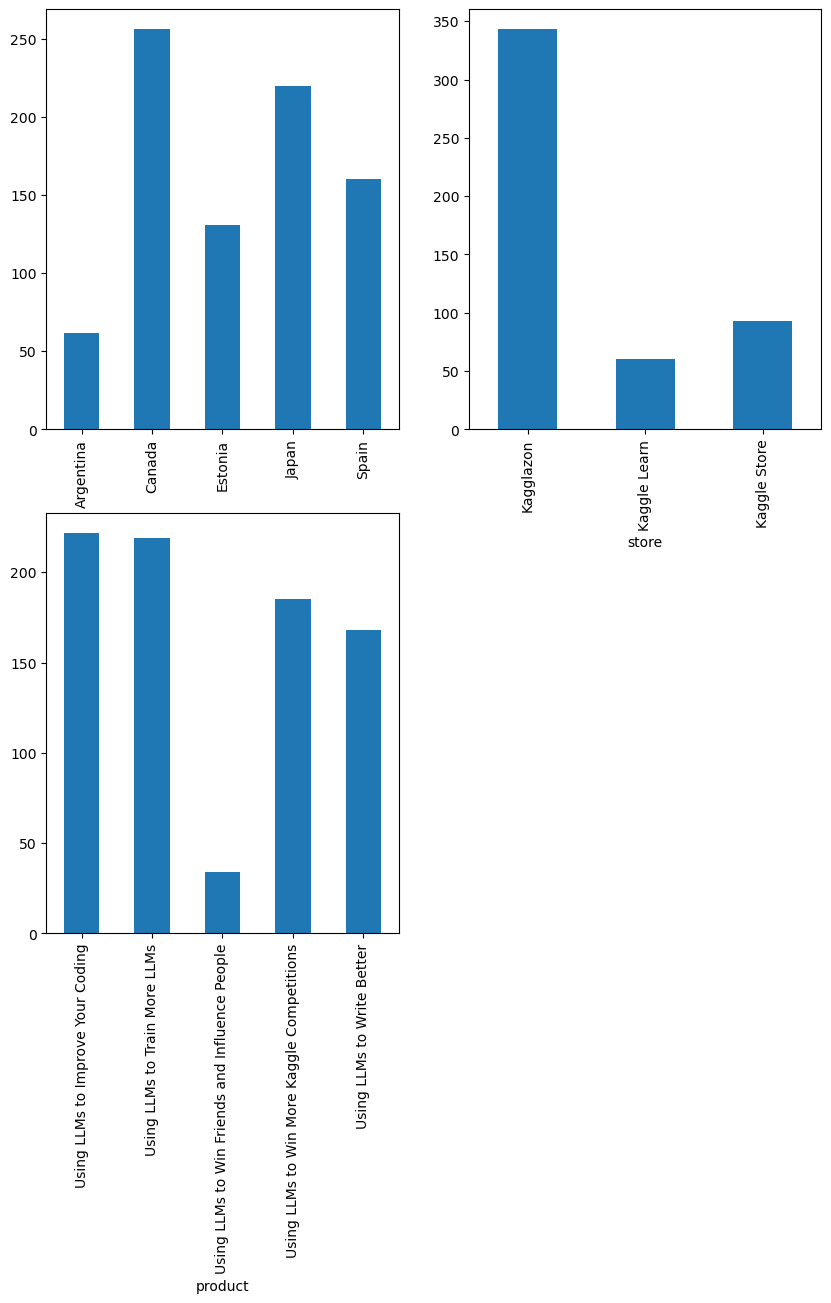

In [11]:
plt.figure(figsize=(10,12))
for i,col in enumerate(['country','store','product']):
    plt.subplot(2,2,i+1)
    df.groupby(col)['num_sold'].mean().plot.bar()

#### **From a company view**:
##### Most selling country: Canada
##### Most visited store: Kagglazon
##### Most bought products: 'Using LLMs to Improve Your Coding' and 'Using LLMs to Train More LLMs'

In [12]:
daily_sales = df.groupby('date')['num_sold'].sum()
# daily_sales['time'] = np.arange(len(daily_sales.index))
daily_sales

date
2017-01-01    20086
2017-01-02    15563
2017-01-03    15039
2017-01-04    14516
2017-01-05    14083
              ...  
2021-12-27    16724
2021-12-28    18507
2021-12-29    20110
2021-12-30    20156
2021-12-31    20422
Freq: D, Name: num_sold, Length: 1826, dtype: int64

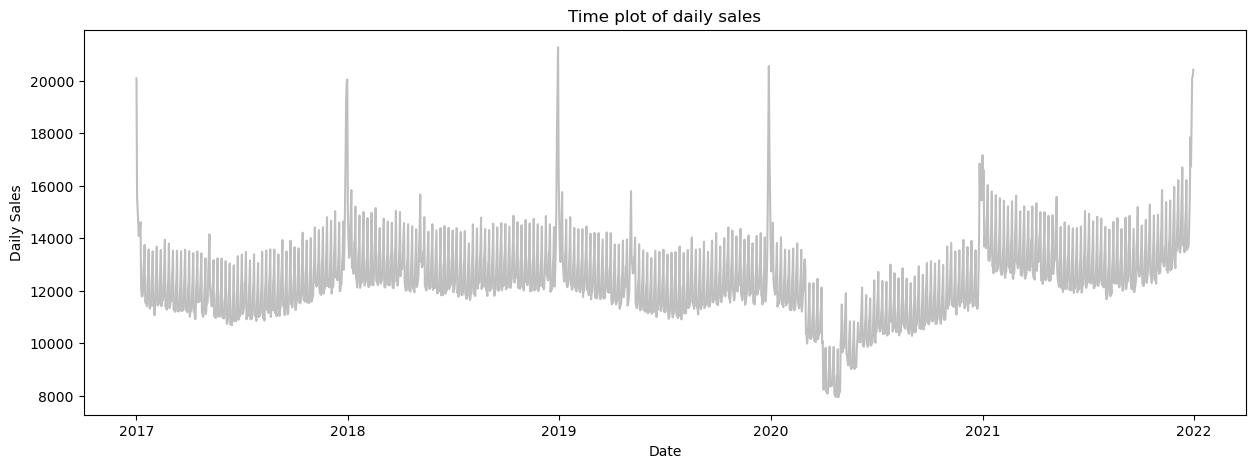

In [13]:
daily_sales.index = daily_sales.index.to_timestamp()

# Plot the daily sales over time
plt.figure(figsize=(15, 5))
plt.plot(daily_sales.index, daily_sales.values, color='0.75')
plt.title('Time plot of daily sales')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.show()

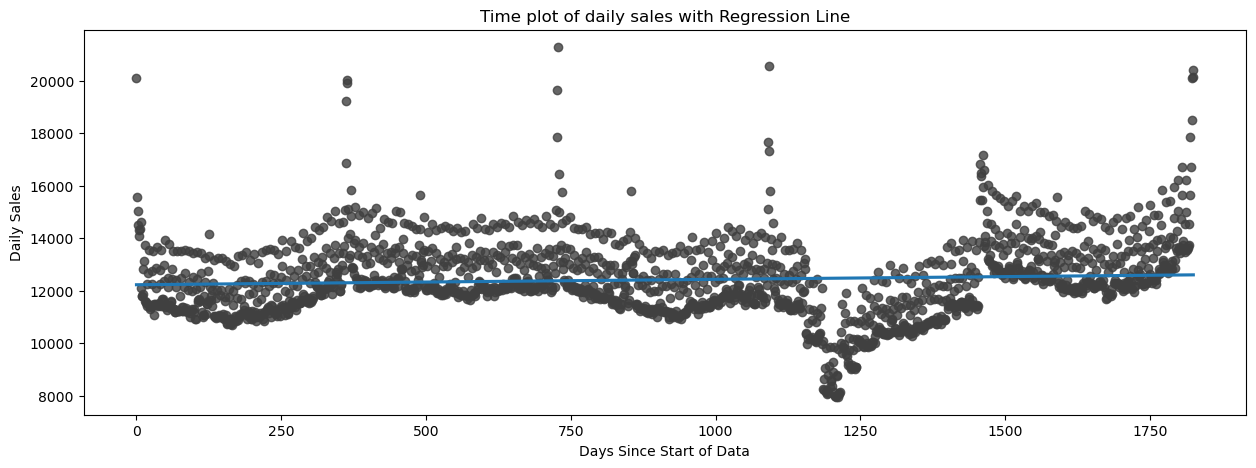

In [14]:
plt.figure(figsize=(15, 5))
sns.regplot(x=np.arange(len(daily_sales)), y=daily_sales.values, ci=None, scatter_kws=dict(color='0.25'))
plt.title('Time plot of daily sales with Regression Line')
plt.xlabel('Days Since Start of Data')
plt.ylabel('Daily Sales')
plt.show()

Are lag features beneficial?

In [15]:
daily_sales = pd.DataFrame(daily_sales)

In [16]:
daily_sales.head()

,num_sold
date,
2017-01-01,20086
2017-01-02,15563
2017-01-03,15039
2017-01-04,14516
2017-01-05,14083


In [17]:
daily_sales['lag_1'] = daily_sales['num_sold'].shift(1)

In [18]:
daily_sales.head()

,num_sold,lag_1
date,,
2017-01-01,20086,NaN
2017-01-02,15563,20086.0
2017-01-03,15039,15563.0
2017-01-04,14516,15039.0
2017-01-05,14083,14516.0


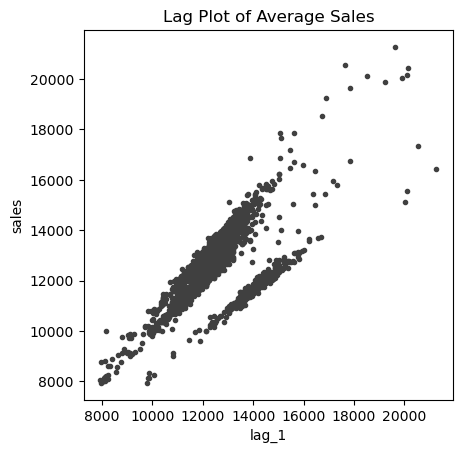

In [19]:
fig, ax = plt.subplots()
ax.plot(daily_sales['lag_1'], daily_sales['num_sold'], '.', color='0.25')
# ax.plot(X['lag_1'], daily_sales[''])
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');

In [20]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

/tmp/ipykernel_32/2504812640.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  daily_sales["week"] = daily_sales.index.week  # the seasonal period (period)
/tmp/ipykernel_32/1565446183.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/tmp/ipykernel_32/1565446183.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/tmp/ipykernel_32/1565446183.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(


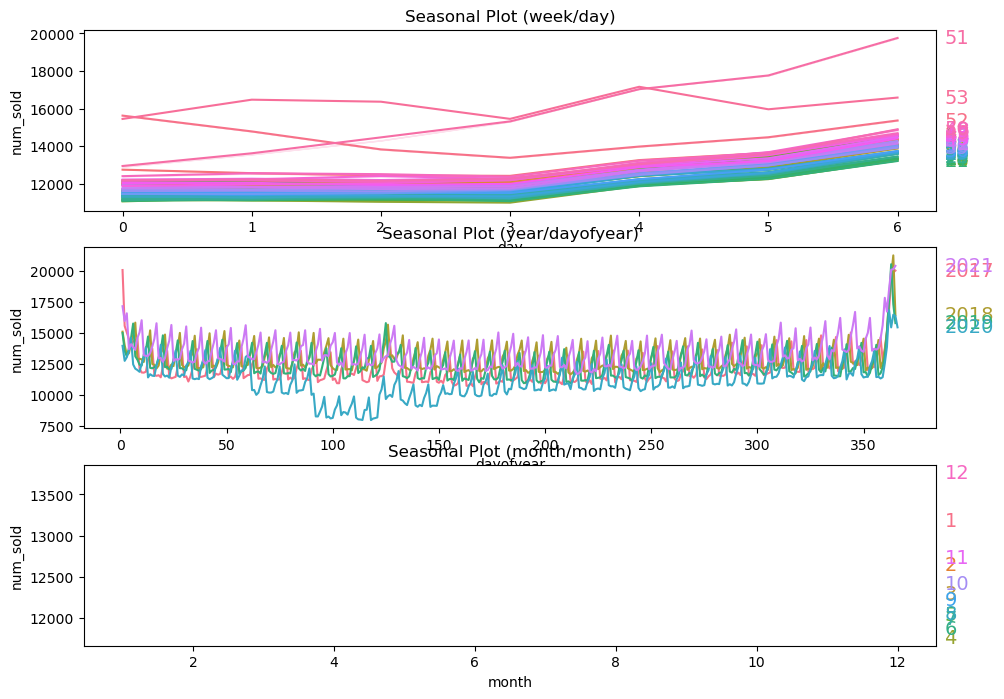

In [21]:
# days within a week
daily_sales["day"] = daily_sales.index.dayofweek  # the x-axis (freq)
daily_sales["week"] = daily_sales.index.week  # the seasonal period (period)
daily_sales['month'] = daily_sales.index.month
# days within a year
daily_sales["dayofyear"] = daily_sales.index.dayofyear
daily_sales["year"] = daily_sales.index.year
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(11, 8))
seasonal_plot(daily_sales, y="num_sold", period="week", freq="day", ax=ax0)
seasonal_plot(daily_sales, y="num_sold", period="year", freq="dayofyear", ax=ax1)
seasonal_plot(daily_sales, y="num_sold", period="month", freq="month", ax=ax2);

/tmp/ipykernel_32/46859205.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='month', y='num_sold', hue='month', data=daily_sales, ci=None, kind='point', palette='husl', height=5, aspect=2)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


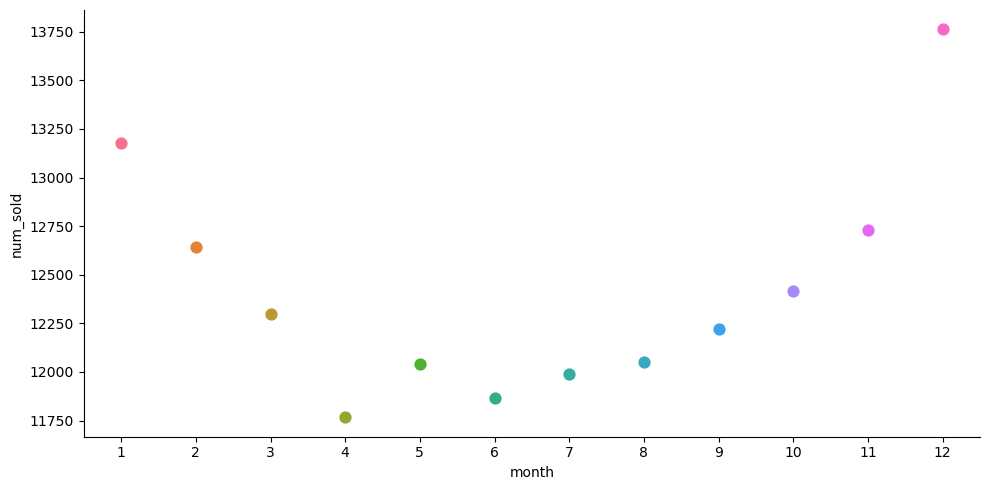

In [22]:
sns.catplot(x='month', y='num_sold', hue='month', data=daily_sales, ci=None, kind='point', palette='husl', height=5, aspect=2)

December has higest sales

In [23]:
daily_sales

,num_sold,lag_1,day,week,month,dayofyear,year
date,,,,,,,
2017-01-01,20086,NaN,6,52,1,1,2017
2017-01-02,15563,20086.0,0,1,1,2,2017
2017-01-03,15039,15563.0,1,1,1,3,2017
2017-01-04,14516,15039.0,2,1,1,4,2017
2017-01-05,14083,14516.0,3,1,1,5,2017
...,...,...,...,...,...,...,...
2021-12-27,16724,17839.0,0,52,12,361,2021
2021-12-28,18507,16724.0,1,52,12,362,2021
2021-12-29,20110,18507.0,2,52,12,363,2021


# Feature Engineering

In [24]:
def parse_date(df):
    df['year'] = df['date'].dt.year.astype('int')
    df['month'] = df['date'].dt.month.astype('int')
    df['day'] = df['date'].dt.day.astype('int')
    df['weekday'] = df['date'].dt.dayofweek.astype('int')
    return df

df = parse_date(df)
df.head()

,id,date,country,store,product,num_sold,year,month,day,weekday
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,6
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,6
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,6
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,6
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,6


In [25]:
df['year'].unique()

array([2017, 2018, 2019, 2020, 2021])

In [26]:
# Relative comparison of sales

In [27]:
for col in ['year','month']:
    print(f'Average item sold in the different {col} are: ', df.groupby(col)['num_sold'].mean())
    print()

Average item sold in the different year are:  year
2017    162.601388
2018    172.564858
2019    165.193498
2020    148.870601
2021    178.428457
Name: num_sold, dtype: float64

Average item sold in the different month are:  month
1     175.723269
2     168.535887
3     163.955441
4     156.885600
5     160.537290
6     158.203289
7     159.862538
8     160.687828
9     162.941956
10    165.516817
11    169.741156
12    183.490839
Name: num_sold, dtype: float64



#### **Insights**
##### Highest were in 2018 and 2021
##### Most books are bought in Jan and Dec (Perhaps new-year resolution XD)

In [28]:
from datetime import datetime
import calendar

def weekend_or_weekday(year, month, day):
    d = datetime(year, month, day)
    if d.weekday() > 4:
        return 0
    else:
        return 1
    
df['is_weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df.head()

,id,date,country,store,product,num_sold,year,month,day,weekday,is_weekday
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,6,0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,6,0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,6,0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,6,0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,6,0


In [29]:
df['is_weekday'].value_counts()

1    97875
0    39075
Name: is_weekday, dtype: int64

In [30]:
df.groupby('is_weekday')['num_sold'].mean()

is_weekday
0    181.313423
1    159.218421
Name: num_sold, dtype: float64

Most sales happen on weekends

In [31]:
df.select_dtypes(include='object').columns.tolist()

['country', 'store', 'product']

In [32]:
def encoder_cat(data):
    cat_cols = ['country', 'store', 'product']
    
    for col in cat_cols:
        temp = pd.get_dummies(data[col], drop_first=True).astype('int')
        data = pd.concat([data, temp], axis=1)
    data.drop(cat_cols, axis=1, inplace=True)
    return data
df = encoder_cat(df)
df.head()

,id,date,num_sold,year,month,day,weekday,is_weekday,Canada,Estonia,Japan,Spain,Kaggle Learn,Kaggle Store,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,0,2017-01-01,63,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,0
1,1,2017-01-01,66,2017,1,1,6,0,0,0,0,0,1,0,1,0,0,0
2,2,2017-01-01,9,2017,1,1,6,0,0,0,0,0,1,0,0,1,0,0
3,3,2017-01-01,59,2017,1,1,6,0,0,0,0,0,1,0,0,0,1,0
4,4,2017-01-01,49,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,1


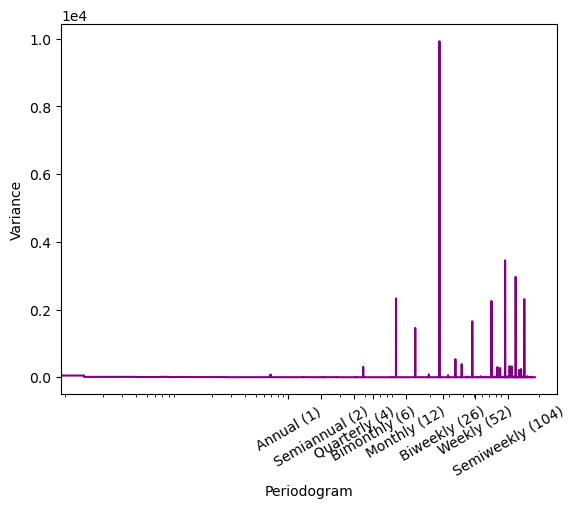

<Figure size 1500x600 with 0 Axes>

In [33]:
from scipy.signal import periodogram

def plot_periodogram(ts, detrend='linear', ax=None):
    fs = pd.Timedelta(days=365)/pd.Timedelta(days=1)
    frequencies, spectrum = periodogram(ts, fs=fs, detrend=detrend, window='boxcar', scaling='spectrum')
    if ax is None:
        _, ax = plt.subplots()
    plt.figure(figsize=(15,6))
    ax.step(frequencies, spectrum, color='purple')
    ax.set_xscale('log')
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
    ax.set_ylabel("Variance")
    ax.set_xlabel("Periodogram")
    return ax


plot_periodogram(df['num_sold'].head(27375))
plt.show()

It shows that the data has a strong monthly seasonality as the frequency is highest in monthly region

In [34]:
type(df['date'])

pandas.core.series.Series

In [35]:
df

,id,date,num_sold,year,month,day,weekday,is_weekday,Canada,Estonia,Japan,Spain,Kaggle Learn,Kaggle Store,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,0,2017-01-01,63,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,0
1,1,2017-01-01,66,2017,1,1,6,0,0,0,0,0,1,0,1,0,0,0
2,2,2017-01-01,9,2017,1,1,6,0,0,0,0,0,1,0,0,1,0,0
3,3,2017-01-01,59,2017,1,1,6,0,0,0,0,0,1,0,0,0,1,0
4,4,2017-01-01,49,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,700,2021,12,31,4,1,0,0,0,1,0,0,0,0,0,0
136946,136946,2021-12-31,752,2021,12,31,4,1,0,0,0,1,0,0,1,0,0,0
136947,136947,2021-12-31,111,2021,12,31,4,1,0,0,0,1,0,0,0,1,0,0
136948,136948,2021-12-31,641,2021,12,31,4,1,0,0,0,1,0,0,0,0,1,0


In [36]:
df = df.set_index('date')

In [37]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq='M', order=12)
dp = DeterministicProcess(
    index=df.index,
    constant=False,
    order=1,
    seasonal=False,
    additional_terms=[fourier],
    drop=True
    )
X_time = dp.in_sample()
X_time.head()
                               

,trend,"sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)","sin(5,freq=M)",...,"sin(8,freq=M)","cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)"
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2017-01-01,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2017-01-01,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2017-01-01,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2017-01-01,5.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [38]:
df

,id,num_sold,year,month,day,weekday,is_weekday,Canada,Estonia,Japan,Spain,Kaggle Learn,Kaggle Store,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
date,,,,,,,,,,,,,,,,,
2017-01-01,0,63,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,0
2017-01-01,1,66,2017,1,1,6,0,0,0,0,0,1,0,1,0,0,0
2017-01-01,2,9,2017,1,1,6,0,0,0,0,0,1,0,0,1,0,0
2017-01-01,3,59,2017,1,1,6,0,0,0,0,0,1,0,0,0,1,0
2017-01-01,4,49,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,136945,700,2021,12,31,4,1,0,0,0,1,0,0,0,0,0,0
2021-12-31,136946,752,2021,12,31,4,1,0,0,0,1,0,0,1,0,0,0
2021-12-31,136947,111,2021,12,31,4,1,0,0,0,1,0,0,0,1,0,0


In [39]:
X_time

,trend,"sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)","sin(5,freq=M)",...,"sin(8,freq=M)","cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)"
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,2.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,3.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,4.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,5.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,136946.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2021-12-31,136947.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2021-12-31,136948.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758


# Model Developments and Predictions

In [41]:
# Target series
y = df.loc[:, 'num_sold']

# X_1: Features for Linear Regression
X_1 = X_time

# X_2: Features for XGBoost
X_2 = df.drop('num_sold', axis=1)  

In [42]:
X_1

,trend,"sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)","sin(5,freq=M)",...,"sin(8,freq=M)","cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)"
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,2.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,3.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,4.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2017-01-01,5.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,136946.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2021-12-31,136947.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2021-12-31,136948.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758


In [43]:
X_2

,id,year,month,day,weekday,is_weekday,Canada,Estonia,Japan,Spain,Kaggle Learn,Kaggle Store,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
date,,,,,,,,,,,,,,,,
2017-01-01,0,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,0
2017-01-01,1,2017,1,1,6,0,0,0,0,0,1,0,1,0,0,0
2017-01-01,2,2017,1,1,6,0,0,0,0,0,1,0,0,1,0,0
2017-01-01,3,2017,1,1,6,0,0,0,0,0,1,0,0,0,1,0
2017-01-01,4,2017,1,1,6,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,136945,2021,12,31,4,1,0,0,0,1,0,0,0,0,0,0
2021-12-31,136946,2021,12,31,4,1,0,0,0,1,0,0,1,0,0,0
2021-12-31,136947,2021,12,31,4,1,0,0,0,1,0,0,0,1,0,0


In [44]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method
        
def fit(self, X_1, X_2, y):
    # YOUR CODE HERE: fit self.model_1
    self.model_1.fit(X_1,y)

    y_fit = pd.Series(
        # YOUR CODE HERE: make predictions with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, name=y.name,
    )

    # YOUR CODE HERE: compute residuals
    y_resid = y - y_fit

    # YOUR CODE HERE: fit self.model_2 on residuals
    self.model_2.fit(X_2, y_resid)

    # Save column names for predict method
    self.y_columns = [y.name]
    # Save data for question checking
    self.y_fit = y_fit
    self.y_resid = y_resid


# Add method to class
BoostedHybrid.fit = fit


def predict(self, X_1, X_2):
    y_pred = pd.Series(
        # predict with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, name='prediction',
    )

    # add self.model_2 predictions to y_pred
    y_pred += self.model_2.predict(X_2)
    
    return y_pred 


# Add method to class
BoostedHybrid.predict = predict

In [45]:
import xgboost as xgb

In [46]:
from sklearn.model_selection import train_test_split

X1_train, X1_val, y_train, y_val = train_test_split(X_1, y,random_state=42,test_size=0.2)
X2_train, X2_val, y_train, y_val = train_test_split(X_2, y,random_state=42,test_size=0.2)

model = BoostedHybrid(LinearRegression(), xgb.XGBRegressor())
model.fit(X1_train, X2_train, y_train)
y_fit = model.predict(X1_train, X2_train).clip(0.0)
y_pred = model.predict(X1_val, X2_val).clip(0.0)

# SMAPE Function

In [47]:
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true) + np.abs(y_pred)
    smape_score = np.mean(2 * numerator / denominator) * 100
    return smape_score

In [50]:
smape(y_val,y_pred)

11.005934096648064

Pretty Impressive!

In [92]:
# Model 1 (trend)
from sklearn.linear_model import ElasticNet, Lasso, Ridge

# Model 2
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


In [100]:
model2 = BoostedHybrid(Lasso(), ExtraTreesRegressor())
model2.fit(X1_train, X2_train, y_train)
y_fit = model2.predict(X1_train, X2_train).clip(0.0)
y_pred = model2.predict(X1_val, X2_val).clip(0.0)

In [103]:
smape(y_train,y_fit)

6.686131547756775e-12

In [101]:
smape(y_val, y_pred)

5.521501052445287

In [142]:
model3 = BoostedHybrid(LinearRegression(), RandomForestRegressor())
model3.fit(X1_train, X2_train, y_train)
y_fit = model3.predict(X1_train, X2_train).clip(0.0)
y_pred = model3.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

2.229029328423119
6.017839623843061


In [105]:
model4 = BoostedHybrid(Lasso(), KNeighborsRegressor())
model4.fit(X1_train, X2_train, y_train)
y_fit = model4.predict(X1_train, X2_train).clip(0.0)
y_pred = model4.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

62.22950207318871
72.53709434647625


In [106]:
model5 = BoostedHybrid(Lasso(), MLPRegressor())
model5.fit(X1_train, X2_train, y_train)
y_fit = model5.predict(X1_train, X2_train).clip(0.0)
y_pred = model5.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

63.59854781135132
63.7892658457704


In [107]:
model6 = BoostedHybrid(Ridge(), MLPRegressor())
model6.fit(X1_train, X2_train, y_train)
y_fit = model6.predict(X1_train, X2_train).clip(0.0)
y_pred = model6.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

60.947388810464254
61.07804202700081


In [108]:
model7 = BoostedHybrid(Ridge(), KNeighborsRegressor())
model7.fit(X1_train, X2_train, y_train)
y_fit = model7.predict(X1_train, X2_train).clip(0.0)
y_pred = model7.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

62.23007937944297
72.53737645079215


In [111]:
model8 = BoostedHybrid(Ridge(), RandomForestRegressor())
model8.fit(X1_train, X2_train, y_train)
y_fit = model8.predict(X1_train, X2_train).clip(0.0)
y_pred = model8.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

2.228189947797574
6.01283189330725


In [112]:
model9 = BoostedHybrid(Ridge(), ExtraTreesRegressor())
model9.fit(X1_train, X2_train, y_train)
y_fit = model9.predict(X1_train, X2_train).clip(0.0)
y_pred = model9.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

4.053741619237793e-13
6.384932303469264


In [126]:
model10 = BoostedHybrid(Ridge(), xgb.XGBRegressor())
model10.fit(X1_train, X2_train, y_train)
y_fit = model10.predict(X1_train, X2_train).clip(0.0)
y_pred = model10.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

10.661368431248855
11.072323120322341


In [127]:
model11 = BoostedHybrid(Lasso(), xgb.XGBRegressor())
model11.fit(X1_train, X2_train, y_train)
y_fit = model11.predict(X1_train, X2_train).clip(0.0)
y_pred = model11.predict(X1_val, X2_val).clip(0.0)
print(smape(y_train,y_fit))
print(smape(y_val, y_pred))

10.201729557613175
10.584100556005001


## Doing the same for test data

In [51]:
test = pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv', parse_dates=['date'], infer_datetime_format=True)
test['date'] = test['date'].dt.to_period('D')
test.head()

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better


In [52]:
test = parse_date(test)
test.head()

,id,date,country,store,product,year,month,day,weekday
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,2022,1,1,5
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,2022,1,1,5
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,2022,1,1,5
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,2022,1,1,5
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,2022,1,1,5


In [53]:
test['is_weekday'] = test.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
test.head()

,id,date,country,store,product,year,month,day,weekday,is_weekday
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,2022,1,1,5,0
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,2022,1,1,5,0
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,2022,1,1,5,0
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,2022,1,1,5,0
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,2022,1,1,5,0


In [54]:
test = encoder_cat(test)
test.head()

,id,date,year,month,day,weekday,is_weekday,Canada,Estonia,Japan,Spain,Kaggle Learn,Kaggle Store,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
0,136950,2022-01-01,2022,1,1,5,0,0,0,0,0,1,0,0,0,0,0
1,136951,2022-01-01,2022,1,1,5,0,0,0,0,0,1,0,1,0,0,0
2,136952,2022-01-01,2022,1,1,5,0,0,0,0,0,1,0,0,1,0,0
3,136953,2022-01-01,2022,1,1,5,0,0,0,0,0,1,0,0,0,1,0
4,136954,2022-01-01,2022,1,1,5,0,0,0,0,0,1,0,0,0,0,1


In [57]:
# test = test.set_index('date')
test.head()

,id,year,month,day,weekday,is_weekday,Canada,Estonia,Japan,Spain,Kaggle Learn,Kaggle Store,Using LLMs to Train More LLMs,Using LLMs to Win Friends and Influence People,Using LLMs to Win More Kaggle Competitions,Using LLMs to Write Better
date,,,,,,,,,,,,,,,,
2022-01-01,136950,2022,1,1,5,0,0,0,0,0,1,0,0,0,0,0
2022-01-01,136951,2022,1,1,5,0,0,0,0,0,1,0,1,0,0,0
2022-01-01,136952,2022,1,1,5,0,0,0,0,0,1,0,0,1,0,0
2022-01-01,136953,2022,1,1,5,0,0,0,0,0,1,0,0,0,1,0
2022-01-01,136954,2022,1,1,5,0,0,0,0,0,1,0,0,0,0,1


In [59]:
df.drop('num_sold',axis=1).columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Alllright!

In [60]:
test.shape

(27375, 16)

In [61]:
X_test_time = dp.out_of_sample(steps=27375, forecast_index=test.index)
# test = pd.concat([test, X_fore], axis=1)

In [62]:
X_test_time

,trend,"sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)","sin(5,freq=M)",...,"sin(8,freq=M)","cos(8,freq=M)","sin(9,freq=M)","cos(9,freq=M)","sin(10,freq=M)","cos(10,freq=M)","sin(11,freq=M)","cos(11,freq=M)","sin(12,freq=M)","cos(12,freq=M)"
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,136951.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136952.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136953.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136954.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2022-01-01,136955.0,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,164321.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2022-12-31,164322.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758
2022-12-31,164323.0,-0.201299,0.97953,-0.394356,0.918958,-0.571268,0.820763,-0.724793,0.688967,-0.848644,...,-0.998717,-0.050649,-0.968077,-0.250653,-0.897805,-0.440394,-0.790776,-0.612106,-0.651372,-0.758758


In [63]:
# Target series
# y = df.loc[:, 'num_sold']

# X_1: Features for Linear Regression
X_1_test = X_test_time

# X_2: Features for XGBoost
X_2_test = test

In [143]:
test_pred = model3.predict(X_1_test, X_2_test)
test_pred.astype('int')

date
2022-01-01     35
2022-01-01     35
2022-01-01      5
2022-01-01     34
2022-01-01     29
             ... 
2022-12-31    678
2022-12-31    727
2022-12-31    107
2022-12-31    667
2022-12-31    542
Freq: D, Name: prediction, Length: 27375, dtype: int64

In [144]:
test['id']

date
2022-01-01    136950
2022-01-01    136951
2022-01-01    136952
2022-01-01    136953
2022-01-01    136954
               ...  
2022-12-31    164320
2022-12-31    164321
2022-12-31    164322
2022-12-31    164323
2022-12-31    164324
Freq: D, Name: id, Length: 27375, dtype: int64

In [145]:
# pd.read_csv('/kaggle/input/playground-series-s3e19/sample_submission.csv')

In [146]:
ss = pd.concat([test['id'],test_pred.astype('int')],axis=1).reset_index(drop=True)

In [147]:
ss

,id,prediction
0,136950,35
1,136951,35
2,136952,5
3,136953,34
4,136954,29
...,...,...
27370,164320,678
27371,164321,727
27372,164322,107
27373,164323,667


In [148]:
ss.rename(columns={'prediction': 'num_sold'}, inplace=True)

In [149]:
ss.to_csv('submission.csv', index=False)
ss.head()

,id,num_sold
0,136950,35
1,136951,35
2,136952,5
3,136953,34
4,136954,29
